PYBER

Data Analysis
1. The data from the bubble plot shows that most riders are suburban, then urban and then rural with average fare being higher for rural areas, then urban and then suburban.
2. The data from the first pie chart shows that the percentage of fares by city type are predominately rural, followed by suburban and urban.
3.  The data from the second pie chart shows that the percentage of rides by city are fairly similar to the first pie chart in terms of percentages.
4.  The data from the last pie chart shows that the majority of drivers are in the rural area, with a few in the suburban, and even less in the urban area.

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [42]:
ride_data_to_load = ("raw_data/ride_data.csv")
city_data_to_load = ("raw_data/city_data.csv")
ride_data = pd.read_csv(ride_data_to_load)
city_data = pd.read_csv(city_data_to_load)
merged_df = pd.merge(ride_data, city_data, how="left", on=["city"])
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [45]:
#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural
urban = merged_df[merged_df["type"] == "Urban"]
suburban = merged_df[merged_df["type"] == "Suburban"]
rural = merged_df[merged_df["type"] == "Rural"]

urban_avg_fare = urban.groupby("city").mean()["fare"]
urban_ride_count = urban.groupby("city").count()["ride_id"]
urban_driver_count = urban.groupby("city").mean()["driver_count"]

suburban_avg_fare = suburban.groupby("city").mean()["fare"]
suburban_ride_count = suburban.groupby("city").count()["ride_id"]
suburban_driver_count = suburban.groupby("city").mean()["driver_count"]

rural_avg_fare = rural.groupby("city").mean()["fare"]
rural_ride_count = rural.groupby("city").count()["ride_id"]
rural_driver_count = rural.groupby("city").mean()["driver_count"]

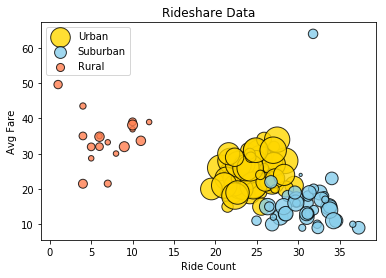

In [57]:
#Plot data
plt.scatter(urban_avg_fare, urban_ride_count, s=10*urban_driver_count, marker ='o', edgecolor="black", color="gold", linewidths=1, alpha=0.8, label="Urban")

plt.scatter(suburban_avg_fare, suburban_ride_count, s=10*suburban_driver_count, marker ='o', edgecolor="black", color="skyblue", linewidths=1, alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, marker ='o', edgecolor="black", color="coral", linewidths=1, alpha=0.8, label="Rural")
    
plt.title("Rideshare Data")
plt.ylabel("Avg Fare")
plt.xlabel("Ride Count")
plt.legend(loc="best")
plt.show()

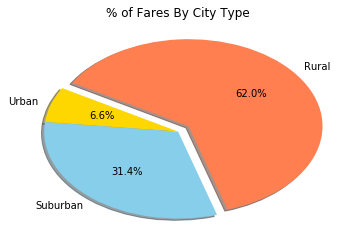

In [58]:
#% of Total Fares by City Type
type_percents = 100 * merged_df.groupby(['type']).sum()['fare'] / merged_df['fare'].sum()

plt.pie(type_percents,
        labels = ["Urban", "Suburban", "Rural"],
        colors = ["gold", "skyblue", "coral"], 
        explode=[0, 0, 0.1],
        autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Fares By City Type")
plt.show()

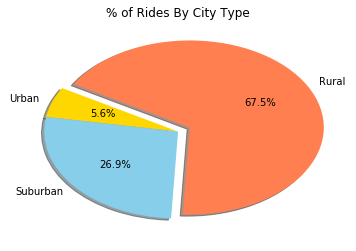

In [59]:
#% of Total Rides by City Type
type_percents1 = 100 * merged_df.groupby(['type']).sum()['ride_id'] / merged_df['ride_id'].sum()

plt.pie(type_percents1,
        labels = ["Urban", "Suburban", "Rural"],
        colors = ["gold", "skyblue", "coral"], 
        explode=[0, 0, 0.1],
        autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Rides By City Type")
plt.show()

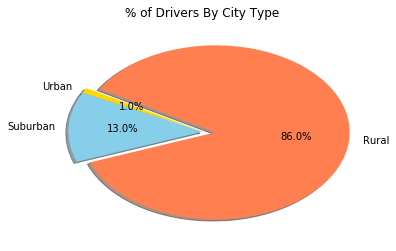

In [60]:
#% of Total Drivers by City Type
type_percents2 = 100 * merged_df.groupby(['type']).sum()['driver_count'] / merged_df['driver_count'].sum()

plt.pie(type_percents2,
        labels = ["Urban", "Suburban", "Rural"],
        colors = ["gold", "skyblue", "coral"], 
        explode=[0, 0, 0.1],
        autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Drivers By City Type")
plt.show()